#### CS166 Pre-class Work for Session 14.1:

### MCMC Parameter Estimation: Cosmology

_Yoav Rabinovich, April 2019_

_____________

#### Exercise 1: What is the universe made of?
 

_WMAP’s website published an interactive simulation that allows you to investigate the effects of the different
cosmological parameters on the primordial power spectrum curve.  Adjust the
6 parameters of the simulation to obtain an overlap between the simulation curve (in blue) and the observational
curve (in red). What are the final values of each parameter for a ‘perfect’ fit?_

https://map.gsfc.nasa.gov/resources/camb_tool/index.html

- Atoms: 4%
- Cold Dark Matter: 22%
- Dark Energy: 74%

- Hubble Constant: 73
- Reionization Redshift: 11
- Spectral Index: 0.95

#### Exercise 2: What is the protactinium half-decay?

_The proctatinium is a radioactive isotope that decays exponentially with time. . In this exercise we will focus on a nonMCMC approach for determining the proctatinium’s half-life. The theoretical value is 1.17 minutes._

In [0]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [0]:
# import data
data = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")

In [0]:
# define curve to fit
def decay_32(t, lamb):
    return 32*np.exp(-lamb*t)

In [0]:
# optimize
trials = 10000
lamb = 1

optimal_params =[]

for t in range(trials):
    # add noise to data
    noise = pd.Series(np.random.normal(0, 1,len(data)))
    noisy = pd.Series(data["count_rate"])
    noisy = noisy+noise
    popt,pcov = curve_fit(decay_32,data["time"],noisy)
    optimal_params.append(popt[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


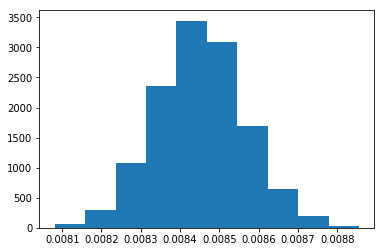

Best estimate for lambda: 0.008453359008483966
Which corresponds to a half-life of 1.3666109528458616 minutes.


In [0]:
# plot
mean = np.mean(optimal_params)
plt.hist(optimal_params,density=True)
plt.axvline(mean,color="r")
plt.show()

#report mean
print("Best estimate for lambda:",np.mean(mean))
print("Which corresponds to a half-life of",np.log(2)/(mean*60),"minutes.")